In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium 


## US Accidents Exploratory Data analaysis
*   Kaggle dataset
*   information about accidents in US between 2016 - 2023
*   Knowing the reasons behind the accidents can help prevent or reduce the accidents

In [3]:
df = pd.read_csv('US_Accidents_March23.csv')

## Data Preparation and Cleaning

*   Load the file using Pandas
*   Look at some information about the dataset size, rows, columns
*   Check for missing values or incorrect values


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
len(df)

7728394

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include = numerics)
len(numeric_df.columns)

13

#### Percentage of missing values per column

In [10]:
missing_percentages = (df.isna().sum().sort_values(ascending = False) / len(df)) *100
missing_percentages

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

In [11]:
missing_percentages = missing_percentages[missing_percentages >0]

<Axes: >

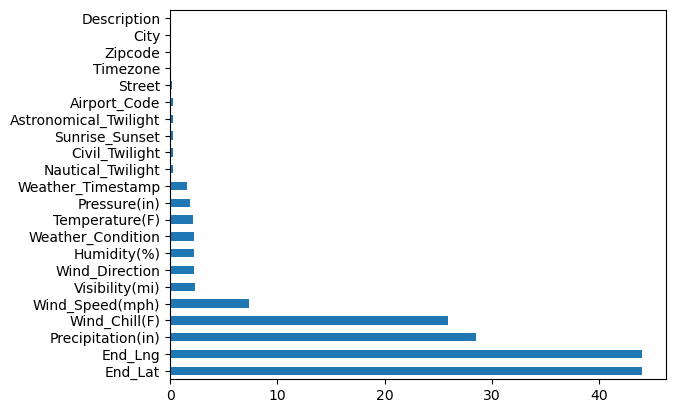

In [12]:
missing_percentages.plot(kind = 'barh')

#### Remove columns that you do not want to use

# Exploratory Data analyis
Columns we'll analyze :
1. City
2. Start Time
3. Start_Lat, Start_lng
4. Temperature
5. Weather Condition

In [15]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## City
1. around 9 % of the total cities are cities with more than 1000 accidents
2. around 91 % of the total cities have less than 1000 accidents
3. The number of accidents per city decreases exponentitally
4. Over 1200 cities have reported just 1 accident(need to investigate)
5. Does New York show up in the data? if yes, why is the count lower if it is the most populated city?
6. Yes, New York is in the top 5 states with most accidents although new york city has considerably less number of accidents.

In [17]:
cities = df.City.unique()

In [18]:
len(cities)

13679

In [19]:
cities[:100]

array(['Dayton', 'Reynoldsburg', 'Williamsburg', 'Westerville',
       'Columbus', 'Miamisburg', 'Johnstown', 'Dublin',
       'Canal Winchester', 'Lebanon', 'Sabina', 'Goshen', 'Waynesville',
       'Springboro', 'Carroll', 'Oregonia', 'Independence',
       'Maple Heights', 'Grove City', 'Findlay', 'Fairborn', 'Piqua',
       'New Richmond', 'Batavia', 'Galena', 'Barberton', 'Akron',
       'Mansfield', 'Cleveland', 'Bethel', 'Pataskala', 'Seville',
       'Bellville', 'Troy', 'Wilmington', 'North Olmsted', 'Groveport',
       'Orient', 'Tiro', 'Strongsville', 'Beavercreek', 'Circleville',
       'Peebles', 'Hurricane', 'Xenia', 'Elyria', 'Pickerington',
       'Burbank', 'Zanesville', 'North Baltimore', 'Mount Sterling',
       'Tipp City', 'Moraine', 'Hilliard', 'Bowling Green', 'Maineville',
       'Vermilion', 'Milford', 'Brookpark', 'Fraziers Bottom',
       'Cambridge', 'Delaware', 'Moscow', 'Oberlin', 'Sardinia',
       'Lewis Center', 'Urbancrest', 'Brecksville', 'Frankfort',

In [20]:
cities_by_accidents = df['City'].value_counts()
cities_by_accidents

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [21]:
cities_by_accidents[:50]

City
Miami              186917
Houston            169609
Los Angeles        156491
Charlotte          138652
Dallas             130939
Orlando            109733
Austin              97359
Raleigh             86079
Nashville           72930
Baton Rouge         71588
Atlanta             68186
Sacramento          66264
San Diego           55504
Phoenix             53974
Minneapolis         51488
Richmond            48845
Oklahoma City       46092
Jacksonville        42447
Tucson              39304
Columbia            38178
San Antonio         37961
Greenville          37802
Saint Paul          37383
Seattle             36564
Portland            35399
San Jose            34536
Indianapolis        33219
Chicago             32035
Tampa               31193
Denver              30557
Kansas City         30107
Tulsa               28880
Riverside           27410
New Orleans         27354
Bronx               27297
Rochester           26866
Fort Lauderdale     26205
Detroit             24865
Grand R

<Axes: ylabel='City'>

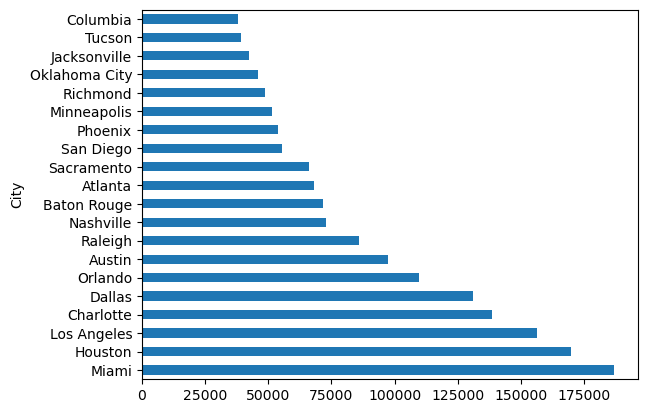

In [22]:
cities_by_accidents[:20].plot(kind = 'barh')

C:\Users\Spegr\AppData\Local\Temp\ipykernel_20948\2851996826.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 10000)


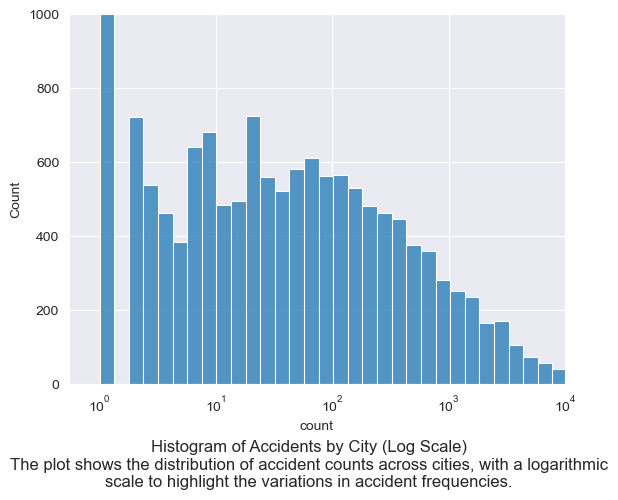

In [168]:
# Set style for the plot
sns.set_style('darkgrid')

# Plot the histogram
sns.histplot(cities_by_accidents, log_scale=True)

# Set x and y axis limits
plt.xlim(0, 10000)
plt.ylim(0, 1000)

# Add caption to the plot
plt.figtext(0.5, -0.1, 'Histogram of Accidents by City (Log Scale)\nThe plot shows the distribution of accident counts across cities, with a logarithmic scale to highlight the variations in accident frequencies.', 
            wrap=True, horizontalalignment='center', fontsize=12)

# Display the plot
plt.show()

In [24]:
cities_by_accidents[cities_by_accidents == 1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

## Start time
1. What time of the day are the accidents most frequent in?
2. Which days of the week have the most accidents?
3. Which months have the most accidents?
4. What is the trend of accidents over year, decreasing or increasing?

1. A high percentage of accidents occur between 6am to 10am, probably people in a hurry to get to work(peak hours)
2. Next high percentage of accidents happen around 3pm to 7pm, probably getting back from work time(peak hour again)
3. Friday has the most number of accidents happen on friday followed by thursday and wednesday.
4. Lowest on the weeknds, saturday and sunday since most people are at work
5. On sundays, the peak occur from 10am to 3pm, unlike weekdays

In [26]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
#there are some rows which have extra characters in their values, hence we provided errors = coerce 

In [27]:
df['Start_Time'][0]

Timestamp('2016-02-08 05:46:00')

In [28]:
hours = df['Start_Time'].dt.hour

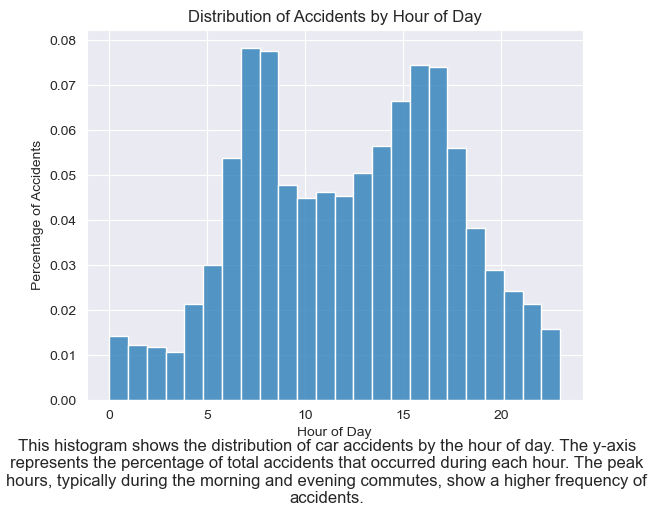

In [170]:
# Set style for the plot
sns.set_style('darkgrid')

# Plot the histogram with percentages
sns.histplot(hours, bins=24, stat="probability", kde=False)

# Set x and y axis labels
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Accidents')

# Add title to the plot
plt.title('Distribution of Accidents by Hour of Day')

# Add caption to the plot
plt.figtext(0.5, -0.1, 
            'This histogram shows the distribution of car accidents by the hour of day. The y-axis represents the percentage of total accidents that occurred during each hour. The peak hours, typically during the morning and evening commutes, show a higher frequency of accidents.', 
            wrap=True, horizontalalignment='center', fontsize=12)

# Display the plot
plt.show()

In [30]:
days = df['Start_Time'].dt.day_name()

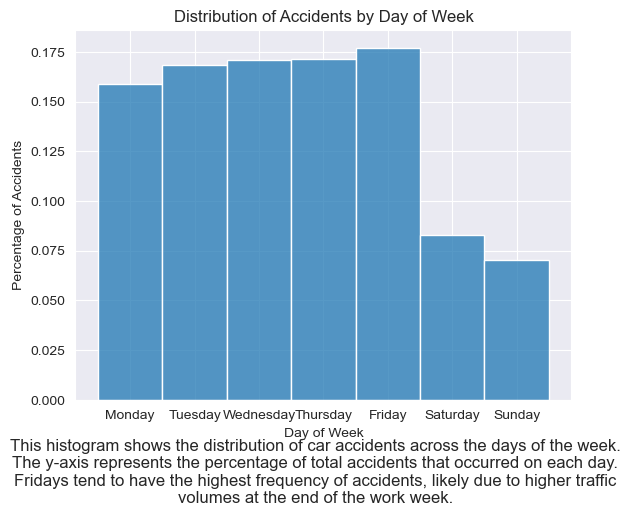

In [172]:
# Set style for the plot
sns.set_style('darkgrid')

# Plot the histogram with percentages
sns.histplot(days, discrete=True, stat="probability", kde=False)

# Set x and y axis labels
plt.xlabel('Day of Week')
plt.ylabel('Percentage of Accidents')

# Add title to the plot
plt.title('Distribution of Accidents by Day of Week')

# Add caption to the plot
plt.figtext(0.5, -0.1, 
            'This histogram shows the distribution of car accidents across the days of the week. The y-axis represents the percentage of total accidents that occurred on each day. Fridays tend to have the highest frequency of accidents, likely due to higher traffic volumes at the end of the work week.', 
            wrap=True, horizontalalignment='center', fontsize=12)

# Display the plot
plt.show()

Is the distribution of accidents by hour the same on weekends as on weekdays

<Axes: xlabel='Start_Time', ylabel='Count'>

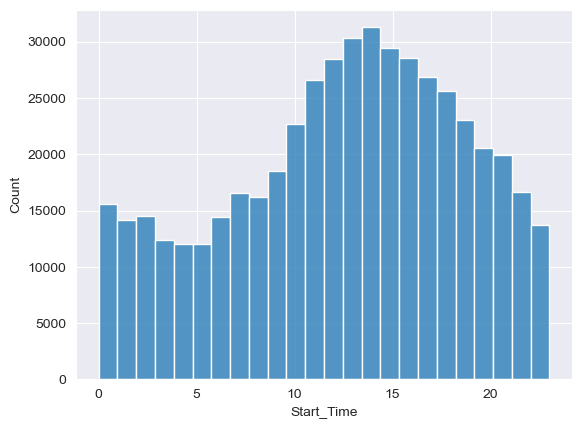

In [33]:
Sunday = df['Start_Time'][df['Start_Time'].dt.day_name() == 'Sunday' ]
sns.histplot(Sunday.dt.hour, bins = 24)

<Axes: xlabel='Start_Time', ylabel='Count'>

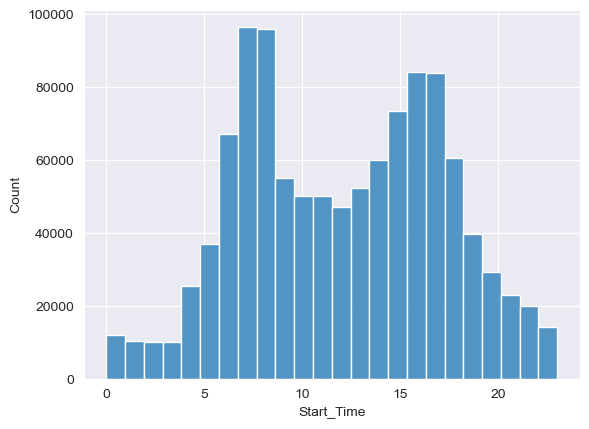

In [34]:
Monday = df['Start_Time'][df['Start_Time'].dt.day_name() == 'Monday' ]
sns.histplot(Monday.dt.hour, bins = 24)

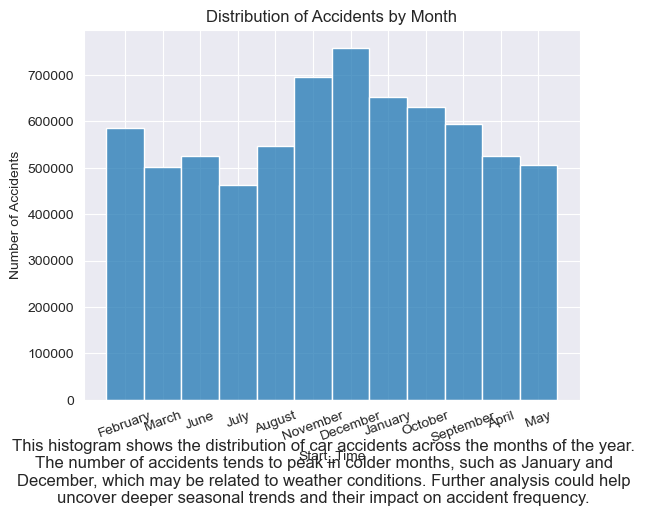

In [179]:
# Extract months from Start_Time
months = df['Start_Time'].dt.month_name()

# Set style for the plot
sns.set_style('darkgrid')

# Plot the histogram of accidents by month
sns.histplot(months, discrete=True, stat="count", kde=False)

# Set x-axis labels for months
#plt.xlabel('Month')
plt.ylabel('Number of Accidents')

# Add title to the plot
plt.title('Distribution of Accidents by Month')

# Rotate x-axis labels for better readability
plt.xticks(rotation=20)

# Add caption to the plot
plt.figtext(0.5, -0.1, 
            'This histogram shows the distribution of car accidents across the months of the year. The number of accidents tends to peak in colder months, such as January and December, which may be related to weather conditions. Further analysis could help uncover deeper seasonal trends and their impact on accident frequency.', 
            wrap=True, horizontalalignment='center', fontsize=12)

# Display the plot
plt.show()

<Axes: xlabel='Start_Time', ylabel='Count'>

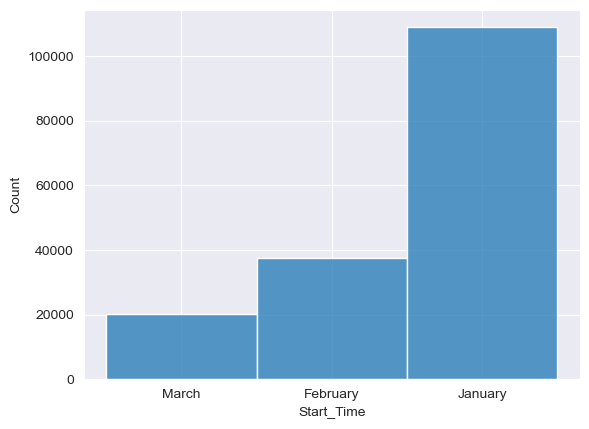

In [36]:
df_2023 = df[df['Start_Time'].dt.year == 2023]
sns.histplot(df_2023['Start_Time'].dt.month_name())

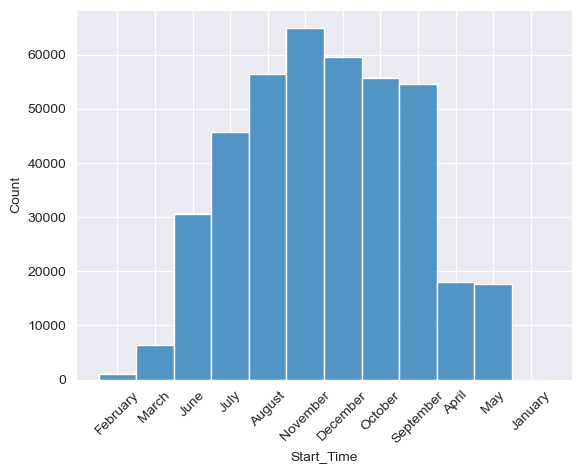

In [37]:
df_2016 = df[df['Start_Time'].dt.year == 2016]
sns.histplot(df_2016['Start_Time'].dt.month_name())
plt.xticks(rotation = 45)
plt.show()

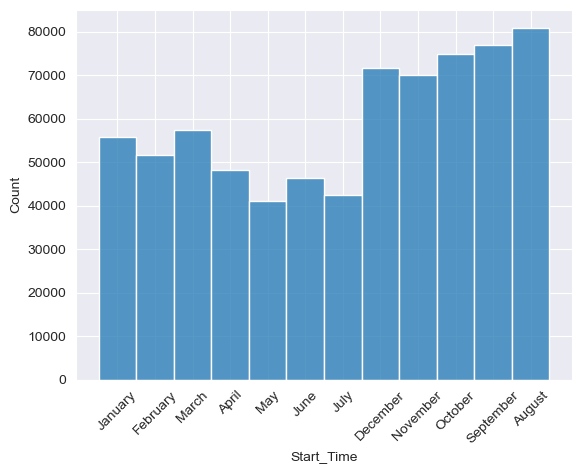

In [38]:
df_2017 = df[df['Start_Time'].dt.year == 2017]
sns.histplot(df_2017['Start_Time'].dt.month_name())
plt.xticks(rotation = 45)
plt.show()

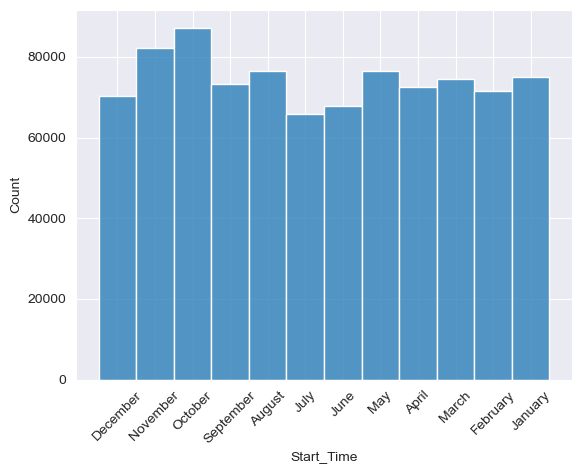

In [39]:
df_2018 = df[df['Start_Time'].dt.year == 2018]
sns.histplot(df_2018['Start_Time'].dt.month_name())
plt.xticks(rotation = 45)
plt.show()

<Axes: ylabel='count'>

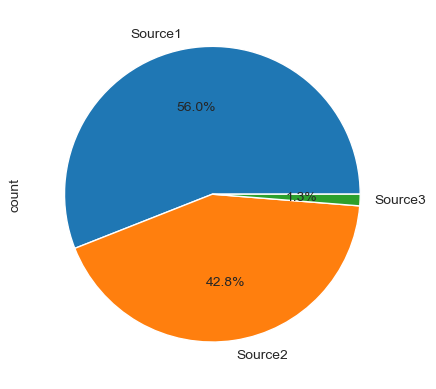

In [40]:
df['Source'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%'          
)

Compare both the data of bing and MapQuedst to see if they are both similar
Source 1 - MapQuest
Source2 - Bing


## Temperature
1. Does temperatures affect the number of accidents in a State?

In [43]:
temp = df['Temperature(F)']

In [44]:
temp.describe()

count    7.564541e+06
mean     6.166329e+01
std      1.901365e+01
min     -8.900000e+01
25%      4.900000e+01
50%      6.400000e+01
75%      7.600000e+01
max      2.070000e+02
Name: Temperature(F), dtype: float64

In [45]:
df_city_miami = df[df['City'] == 'Miami']
df_city_miami.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
116057,A-116064,Source2,2,2016-11-30 16:40:31,2016-11-30 17:10:19,25.627699,-80.374451,NaN,NaN,0.01,...,False,False,True,False,True,False,Day,Day,Day,Day
116060,A-116067,Source2,2,2016-11-30 15:16:19,2016-11-30 17:01:03,25.963093,-80.185677,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
116061,A-116068,Source2,2,2016-11-30 16:55:31,2016-11-30 17:25:11,25.841373,-80.322037,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
116062,A-116069,Source2,3,2016-11-30 16:57:23,2016-11-30 17:27:10,25.812199,-80.205856,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
116064,A-116071,Source2,2,2016-11-30 17:15:52,2016-11-30 17:45:36,25.781235,-80.337181,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [46]:
df_city_miami['Source'].value_counts() / len(df_city_miami)

Source
Source1    0.820712
Source2    0.175115
Source3    0.004173
Name: count, dtype: float64

In [47]:
df_city_miami_source1 = df_city_miami[df_city_miami['Source'] == 'Source1']

In [48]:
df_city_miami_source1['Start_Time'].dt.month_name().value_counts()

Start_Time
December     16681
November     14807
January      13323
October      12431
September    10679
February     10673
April        10144
May           8973
March         6808
June          6616
August        6574
July          5321
Name: count, dtype: int64

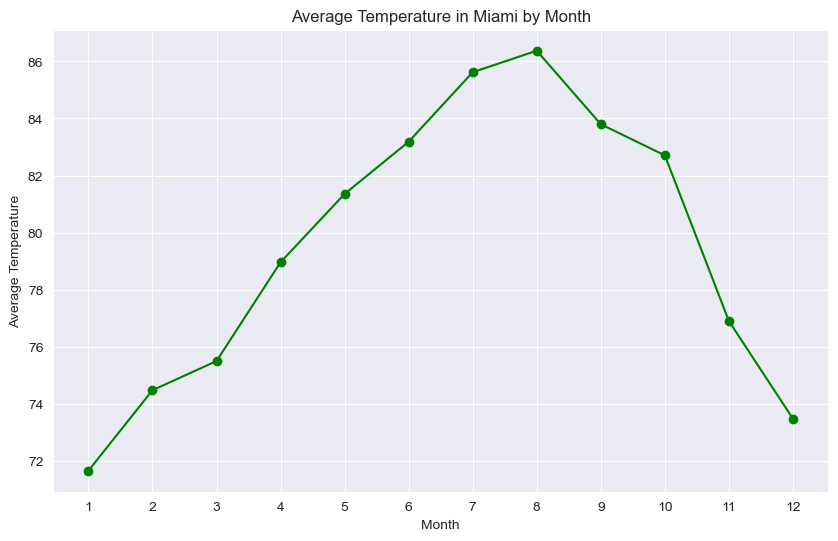

In [49]:
# Calculate average temperature for each month
monthly_avg_temp = df_city_miami_source1.groupby(df_city_miami_source1['Start_Time'].dt.month)['Temperature(F)'].mean()

# Plot
plt.figure(figsize=(10, 6))
monthly_avg_temp.plot(kind='line', marker='o', color='g')
plt.title('Average Temperature in Miami by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.xticks(range(1, 13))  # Ensure months are labeled 1 to 12
plt.show()

In [50]:
df_houston_source1 = df[df['City'] == 'Houston']

In [51]:
df_houston_source1 = df_houston_source1[df_houston_source1['Source'] == 'Source1']

In [52]:
df_houston_source1['Start_Time'].dt.month_name().value_counts()

Start_Time
December     6397
November     5475
January      5217
October      4485
September    4128
February     3636
April        3473
May          3363
June         3222
August       3174
March        2935
July         2830
Name: count, dtype: int64

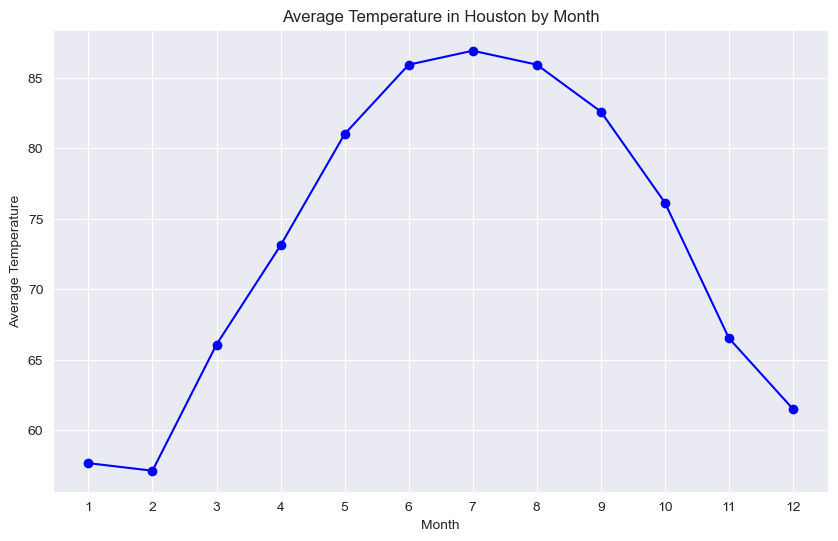

In [53]:
month_avg_temp = df_houston_source1.groupby(df_houston_source1['Start_Time'].dt.month)['Temperature(F)'].mean()

plt.figure(figsize = (10,6))
month_avg_temp.plot(kind = 'line', marker = 'o', color = 'b')
plt.title('Average Temperature in Houston by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.xticks(range(1, 13))  # Ensure months are labeled 1 to 12
plt.show()

## Weather Conditions

In [55]:
df_Source1 = df[df['Source']=='Source1']

In [56]:
df_Source1 = df[df['Source']=='Source2']

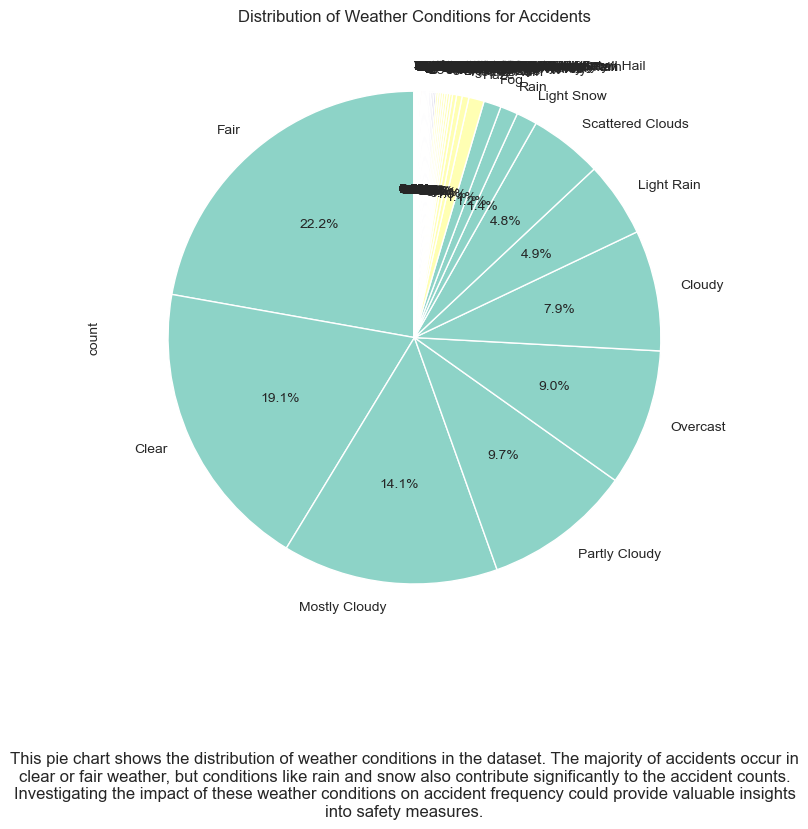

In [182]:
# Plot pie chart for Weather Condition value counts
weather_counts = df_Source1['Weather_Condition'].value_counts()

# Set the figure size for the plot
plt.figure(figsize=(8, 8))

# Create pie chart
weather_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3', legend=False)

# Add title
plt.title('Distribution of Weather Conditions for Accidents')

# Add caption below the plot
plt.figtext(0.5, -0.1, 
            'This pie chart shows the distribution of weather conditions in the dataset. The majority of accidents occur in clear or fair weather, but conditions like rain and snow also contribute significantly to the accident counts. Investigating the impact of these weather conditions on accident frequency could provide valuable insights into safety measures.', 
            wrap=True, horizontalalignment='center', fontsize=12)

# Display the plot
plt.show()

## Start_ Lat and Start_Lng

In [59]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [60]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

In [61]:
sample_df = df.sample(int(0.1 * len(df)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

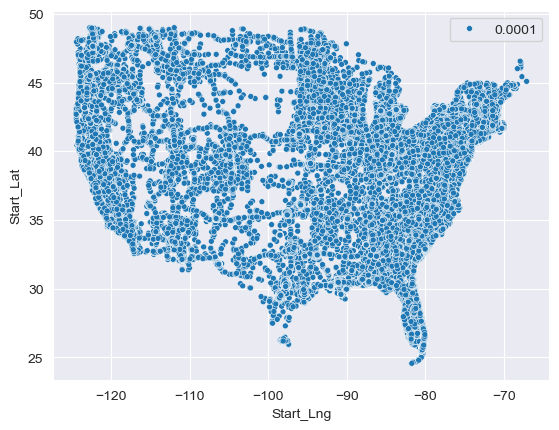

In [62]:
sns.scatterplot(x = sample_df.Start_Lng, y = sample_df.Start_Lat, size = 0.0001)

## State
1. Are there more accidents in warmer or colder areas? Find out based on states
2. Which 5 states has the highest number of accidents?7960

In [137]:
state_count = df['State'].value_counts()
state_avg_temp = df.groupby(df['State'])['Temperature(F)'].mean()

In [156]:
df['State'].value_counts()

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: count, dtype: int64

In [139]:
state_df = pd.DataFrame({
    'State_count' : state_count,
    'state_avg_temp' : state_avg_temp
})
state_df.head()

In [145]:
correlation = state_df.corr()

# Display the correlation matrix
print(correlation)

                State_count  state_avg_temp
State_count        1.000000        0.399744
state_avg_temp     0.399744        1.000000


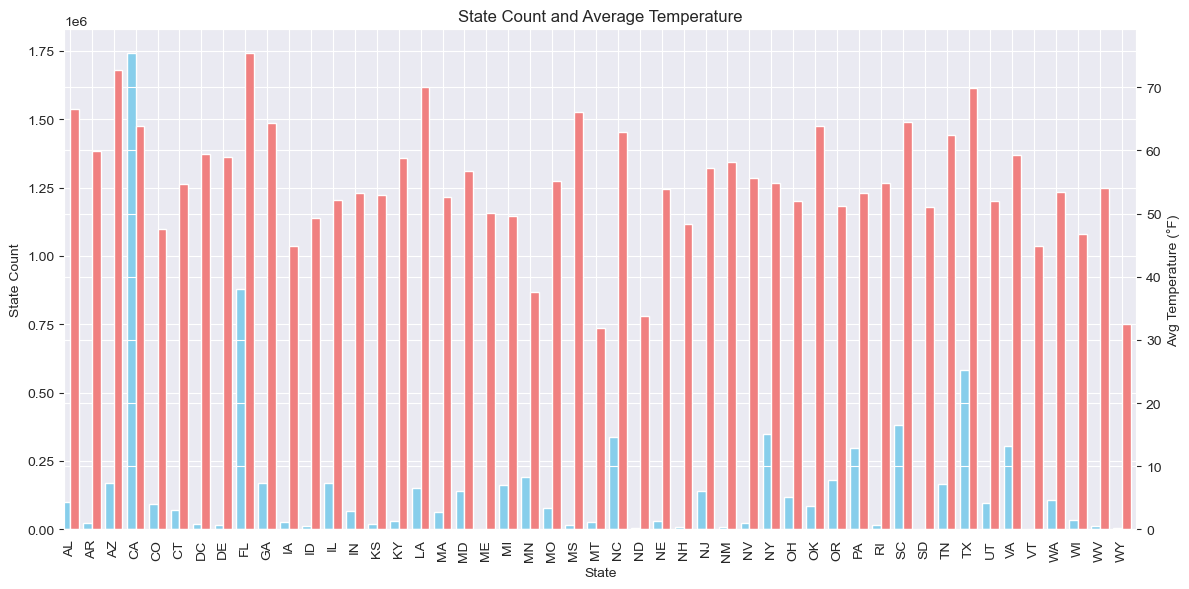

In [151]:
import matplotlib.pyplot as plt

# Create a figure with two subplots: one for count and one for average temperature
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for State_Count
state_df['State_count'].plot(kind='bar', color='skyblue', ax=ax1, position=1, width=0.4, label='State Count')
ax1.set_ylabel('State Count')
ax1.set_xlabel('State')
ax1.set_title('State Count and Average Temperature')

# Create a second axis for the Avg_Temperature
ax2 = ax1.twinx()
state_df['state_avg_temp'].plot(kind='bar', color='lightcoral', ax=ax2, position=0, width=0.4, label='Avg Temperature')
ax2.set_ylabel('Avg Temperature (°F)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

# Summary and Conclusion
1. around 9 % of the total cities are cities with more than 1000 accidents
2. around 91 % of the total cities have less than 1000 accidents
3. The number of accidents per city decreases exponentitally
4. Over 1200 cities have reported just 1 accident(need to investigate)
5. A high percentage of accidents occur between 6am to 10am, probably people in a hurry to get to work(peak hours)
6. Next high percentage of accidents happen around 3pm to 7pm, probably getting back from work time(peak hour again)
7. Friday has the most number of accidents happen on friday followed by thursday and wednesday.
8. Lowest on the weeknds, saturday and sunday since most people are at work
9. On sundays, the peak occur from 10am to 3pm, unlike weekdays
10. 56 % of data is from MapQuest and 42.8% data is from bing
11. We found out, that temperatures are very low in the months January, Decemeber and these motnhs also have the most number of accidents which means more accidents tends to happen in lower temperatures. This makes us question about the visibility column which can give more details whether temperatures affect visibilty and indeed casue more accidents.
12. More than 50 percentage of the accidents happen in, fair, clear, mostly cloudy and partly cloudy weather conditions. (Can investigate the temperatures during these weather conditions)
13. Based on the correlation and the bar graph below, it can be seen that warmer places tend to have higher accidents but need to be investigated more